In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline

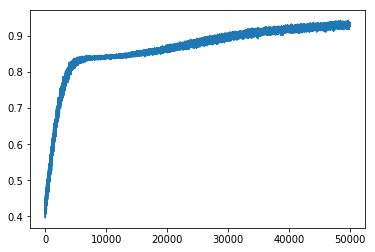

In [72]:
f = open("train.txt", "r")
l = []
while True:
    num = f.readline().strip()
    if not num:
        break
    num = float(num)
    l.append(num)

plt.plot(range(len(l)), l)
# plt.show()
# plt.savefig("accuracy_train.png")

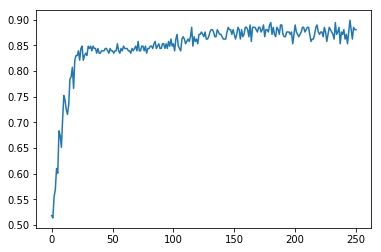

In [73]:
f = open("test.txt", "r")
l = []
while True:
    num = f.readline().strip()
    if not num:
        break
    num = float(num)
    l.append(num)

plt.plot(range(len(l)), l)

In [16]:
import pandas as pd
import numpy as np

In [17]:
df_train = pd.read_csv('/Users/qianzecheng/Downloads/contest/train.csv')

In [18]:
def feature_normalize(dataset):
    '''
    特征均一化
    '''
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def str_to_int(df):
    str_columns = df.select_dtypes(['object']).columns
    print(str_columns)
    for col in str_columns:
        df[col] = df[col].astype('category')

    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

def count_space_except_nan(x):
    if isinstance(x,str):
        return x.count(" ") + 1
    else :
        return 0
    
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        del df[each]
        df = pd.concat([df, dummies], axis=1)
    return df

def pre_processing(df):
    # df.drop(delete_columns, axis=1, inplace=True)
    # Count room nubmer
    # df_train["Cabin"] = df_train["Cabin"].apply(count_space_except_nan)
    # Replace NaN with mean value
    df["DistanceFromHome"].fillna(df["DistanceFromHome"].mean(), inplace=True)
    df["LastYearTrainingTime"].fillna(df["LastYearTrainingTime"].mean(), inplace=True)
    # EducationLevel, Embarked one-hot
    # df = one_hot(df, df.loc[:, ["EducationLevel"]].columns)
    # df = one_hot(df, df.loc[:, ["EducationField"]].columns)
    # df = one_hot(df, df.loc[:, ["Travel_For_Business"]].columns)
    # df = one_hot(df, df.loc[:, ["MaritalStatus"]].columns)
    # df = one_hot(df, df.loc[:, ["EnvironmentSatisfaction"]].columns)
    # df = one_hot(df, df.loc[:, ["JobInvolvement"]].columns)
    # df = one_hot(df, df.loc[:, ["JobSatisfaction"]].columns)
    # df = one_hot(df, df.loc[:, ["PerformanceRating"]].columns)
    # df = one_hot(df, df.loc[:, ["RelationshipSatisfaction"]].columns)
    # df = one_hot(df, df.loc[:, ["WorkLifeBalance"]].columns)
    # df = one_hot(df, df.loc[:, ["JobLevel"]].columns)
    # df = one_hot(df, df.loc[:, ["JobRole"]].columns)
    # df = one_hot(df, df.loc[:, ["StockOptionLevel"]].columns)
    
    
    
    # String to int
    df = str_to_int(df)
    # Age Normalization
    
    df["EducationLevel"] = feature_normalize(df["EducationLevel"])
    df["EducationField"] = feature_normalize(df["EducationField"])
    df["Travel_For_Business"] = feature_normalize(df["Travel_For_Business"])
    df["MaritalStatus"] = feature_normalize(df["MaritalStatus"])
    df["EnvironmentSatisfaction"] = feature_normalize(df["EnvironmentSatisfaction"])
    df["JobInvolvement"] = feature_normalize(df["JobInvolvement"])
    # df["JobSatisfaction"] = feature_normalize(df["JobSatisfaction"])
    df["RelationshipSatisfaction"] = feature_normalize(df["RelationshipSatisfaction"])
    # df["WorkLifeBalance"] = feature_normalize(df["WorkLifeBalance"])
    df["JobLevel"] = feature_normalize(df["JobLevel"])
    df["JobRole"] = feature_normalize(df["JobRole"])
    df["StockOptionLevel"] = feature_normalize(df["StockOptionLevel"])
    
    
    df["DailyRate"] = feature_normalize(df["DailyRate"])
    df["HourlyRate"] = feature_normalize(df["HourlyRate"])
    df["MonthlyRate"] = feature_normalize(df["MonthlyRate"])
    df["Age"] = feature_normalize(df["Age"])
    df["DistanceFromHome"] = feature_normalize(df["DistanceFromHome"])
    df["PercentSalaryHike"] = feature_normalize(df["PercentSalaryHike"])
    df["YearsAtCompany"] = feature_normalize(df["YearsAtCompany"])
    #df["YearsWithCurrManager"] = feature_normalize(df["YearsWithCurrManager"])
    df["YearsSinceLastPromotion"] = feature_normalize(df["YearsSinceLastPromotion"])
    df["MonthlyIncome"] = feature_normalize(df["MonthlyIncome"])
    df["TotalWorkingYears"] = feature_normalize(df["TotalWorkingYears"])
    df["YearsInCurrentRole"] = feature_normalize(df["YearsInCurrentRole"])
    df["NumCompaniesWorked"] = feature_normalize(df["NumCompaniesWorked"])
    
    # df["EmployeeNumber"] = feature_normalize(df["EmployeeNumber"]) 
    # stats.describe(df).variance
    return df

In [19]:
df_train = pre_processing(df_train)

Index(['Name', 'AttritionStatus', 'JobSatisfaction', 'Over18', 'JobRole',
       'Gender', 'Travel_For_Business', 'EducationField', 'MaritalStatus',
       'PerformanceRating', 'OverTime', 'Department'],
      dtype='object')


In [20]:
df_train_j = list(df_train["JobSatisfaction"])
df_train_y = list(df_train["YearsWithCurrManager"])

In [21]:
print(df_train_j[1])
print(df_train_y[1])

2
2


In [25]:
y = {} # count
y_count = {}


for i in range(len(df_train_y)):
    if df_train_y[i] in y.keys():
        y[df_train_y[i]] += df_train_j[i]
        y_count[df_train_y[i]] += 1
    else:
        y[df_train_y[i]] = df_train_j[i]
        y_count[df_train_y[i]] = 1

In [27]:
y

{2: 461,
 7: 269,
 3: 157,
 9: 92,
 0: 321,
 8: 169,
 12: 25,
 13: 20,
 4: 139,
 11: 30,
 17: 11,
 5: 44,
 6: 40,
 1: 112,
 10: 26,
 15: 6,
 14: 5,
 16: 0}

In [28]:
y_count

{2: 259,
 7: 154,
 3: 97,
 9: 51,
 0: 187,
 8: 89,
 12: 15,
 13: 12,
 4: 76,
 11: 16,
 17: 7,
 5: 26,
 6: 23,
 1: 58,
 10: 20,
 15: 3,
 14: 5,
 16: 2}

In [29]:
for i in y.keys():
    y[i] = y[i]/y_count[i]

In [34]:
y

{2: 1.77992277992278,
 7: 1.7467532467532467,
 3: 1.6185567010309279,
 9: 1.803921568627451,
 0: 1.7165775401069518,
 8: 1.898876404494382,
 12: 1.6666666666666667,
 13: 1.6666666666666667,
 4: 1.8289473684210527,
 11: 1.875,
 17: 1.5714285714285714,
 5: 1.6923076923076923,
 6: 1.7391304347826086,
 1: 1.9310344827586208,
 10: 1.3,
 15: 2.0,
 14: 1.0,
 16: 0.0}

In [41]:
px = list(y.keys())
py = list(y.values())

In [42]:
px

[2, 7, 3, 9, 0, 8, 12, 13, 4, 11, 17, 5, 6, 1, 10, 15, 14, 16]

In [44]:
py

[1.77992277992278,
 1.7467532467532467,
 1.6185567010309279,
 1.803921568627451,
 1.7165775401069518,
 1.898876404494382,
 1.6666666666666667,
 1.6666666666666667,
 1.8289473684210527,
 1.875,
 1.5714285714285714,
 1.6923076923076923,
 1.7391304347826086,
 1.9310344827586208,
 1.3,
 2.0,
 1.0,
 0.0]

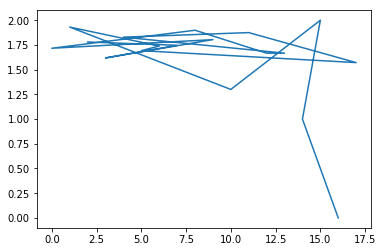

In [45]:
plt.plot(px,py)

In [51]:
a = list(range(10))
b = list(range(10))

In [50]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

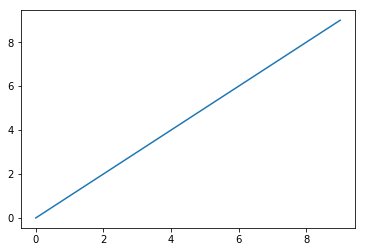

In [53]:
plt.plot(a,b)

In [54]:
px

[2, 7, 3, 9, 0, 8, 12, 13, 4, 11, 17, 5, 6, 1, 10, 15, 14, 16]

In [55]:
py

[1.77992277992278,
 1.7467532467532467,
 1.6185567010309279,
 1.803921568627451,
 1.7165775401069518,
 1.898876404494382,
 1.6666666666666667,
 1.6666666666666667,
 1.8289473684210527,
 1.875,
 1.5714285714285714,
 1.6923076923076923,
 1.7391304347826086,
 1.9310344827586208,
 1.3,
 2.0,
 1.0,
 0.0]

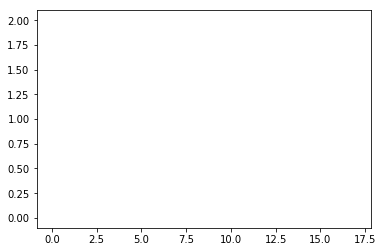

In [56]:
for i in range(len(px)):
    plt.plot(px[i], py[i])

In [57]:
px

[2, 7, 3, 9, 0, 8, 12, 13, 4, 11, 17, 5, 6, 1, 10, 15, 14, 16]

In [58]:
py

[1.77992277992278,
 1.7467532467532467,
 1.6185567010309279,
 1.803921568627451,
 1.7165775401069518,
 1.898876404494382,
 1.6666666666666667,
 1.6666666666666667,
 1.8289473684210527,
 1.875,
 1.5714285714285714,
 1.6923076923076923,
 1.7391304347826086,
 1.9310344827586208,
 1.3,
 2.0,
 1.0,
 0.0]

In [59]:
y

{2: 1.77992277992278,
 7: 1.7467532467532467,
 3: 1.6185567010309279,
 9: 1.803921568627451,
 0: 1.7165775401069518,
 8: 1.898876404494382,
 12: 1.6666666666666667,
 13: 1.6666666666666667,
 4: 1.8289473684210527,
 11: 1.875,
 17: 1.5714285714285714,
 5: 1.6923076923076923,
 6: 1.7391304347826086,
 1: 1.9310344827586208,
 10: 1.3,
 15: 2.0,
 14: 1.0,
 16: 0.0}

In [60]:
px.sort()

In [61]:
px

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [62]:
py = []

In [63]:
for i in px:
    py.append(y[px[i]])

In [64]:
py

[1.7165775401069518,
 1.9310344827586208,
 1.77992277992278,
 1.6185567010309279,
 1.8289473684210527,
 1.6923076923076923,
 1.7391304347826086,
 1.7467532467532467,
 1.898876404494382,
 1.803921568627451,
 1.3,
 1.875,
 1.6666666666666667,
 1.6666666666666667,
 1.0,
 2.0,
 0.0,
 1.5714285714285714]

Text(0, 0.5, 'JobSatisfaction')

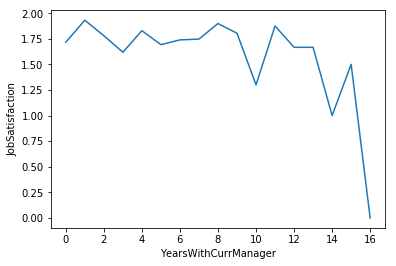

In [72]:
py[-3] = 1.50
plt.plot(px[:-1],py[:-1])
plt.xlabel("YearsWithCurrManager")
plt.ylabel("JobSatisfaction")

In [68]:
py[-1]

1.5714285714285714

In [70]:
py[-3]

2.0